# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations. This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

### Data sources:

Both Observations.csv and Species_info.csv was provided by Codecademy.com.



**Note:** The data for this project is inspired by real data, but is mostly fictional.

## Scope:

The project is organized into several key sections. Firstly, the project goals section outlines high-level objectives and establishes the project's intentions. Secondly, although the data has been provided, it requires a comprehensive check to identify and address any inconsistencies. Thirdly, in the analysis section, we consider different methods and questions aligned with the project goals. Finally, the evaluation section enables the derivation of conclusions and findings from our analysis.

## Project Goals

In this project, we adopt the viewpoint of a biodiversity analyst working for the National Parks Service. The primary objectives include understanding characteristics of at-risk species, assessing their conservation status, and exploring the relationship between these species and the national parks. 

Key questions include:
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are there significant differences between species and their conservation status?
- Which animal is most prevalent, and how is their distribution among parks?

## Data

This project has two data sets, the first csv file has information about each species and the other has observations of species with park locations. This data will be used to analyze the goals of the project.

## Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

- Distributions
- counts
- relationship between species
- conservation status of species
- observations of species in parks.

## Evaluation:

Finally, it's prudent to reassess the goals and verify if the analysis output aligns with the initial questions outlined in the goals section. This phase will also delve into the insights gained during the process and acknowledge any unanswered questions. Additionally, it may address limitations or consider alternative methodologies that could have been employed in the analysis.

-------------------------------------------------------------------------------------------------------------------

## Importing Python Modules

In [230]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading the Data

In [176]:
species = pd.read_csv('species_info.csv')
obvs = pd.read_csv('observations.csv')

In [177]:
print("Species Dataset:\n")
print(species.shape)
species.head()

Species Dataset:

(5824, 4)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [178]:
print("Observations Dataset:\n")
print(obvs.shape)
obvs.head()

Observations Dataset:

(23296, 3)


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Exploratory Analysis of the Data

In [179]:
num_species = species.scientific_name.nunique()
print("Number of species: " + str(num_species))
num_categories = species.category.nunique()
print("Number of categories: " + str(num_categories))
categories = species.category.unique()
print("Unique categories: " + str(categories))

Number of species: 5541
Number of categories: 7
Unique categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [180]:
num_cons_status = species.conservation_status.nunique()
print("Number of conservation statuses: " + str(num_cons_status))
conservation_status = species.conservation_status.unique()
print("Unique conservation statuses: " + str(conservation_status))

Number of conservation statuses: 4
Unique conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [181]:
print(species.groupby("conservation_status").size())
empty_status = species.conservation_status.isna().sum()
print("\nNumber of empty conservation status values: " + str(empty_status))

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

Number of empty conservation status values: 5633


In [182]:
num_parks = obvs.park_name.nunique()
print("Number of parks: " + str(num_parks))
parks_names = obvs.park_name.unique()
print("Parks names: " + str(parks_names))

Number of parks: 4
Parks names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [183]:
total_obvs = obvs.observations.sum()
print("Total number of observations: " + str(total_obvs))

Total number of observations: 3314739


## Analysis

In this section we will begin analyzing the data after the initial exploration. The first task will be to clean and explore the `conservation_status` column in the `species` dataframe. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `Nan` values were detected. These values will need to be converted to `No Intervention`.

### Replacing the empty values

In [184]:
species.conservation_status.fillna('No Intervention', inplace = True) 
print(species.groupby("conservation_status").size())
species.head(5)

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


Next step is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. 

In [185]:
conservationCategory = species[species.conservation_status != "No Intervention"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


## Question nº1

Let's generate a visual representation to address our initial question: **"What is the distribution of conservation status for species?"** This visualization will provide a clearer insight into the data.

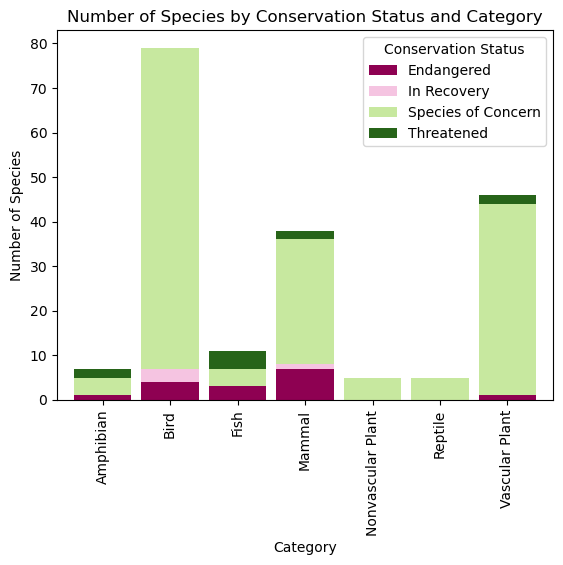

In [186]:
conservationCategory.T.plot(kind='bar', stacked=True, width=0.85, colormap='PiYG')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.title('Number of Species by Conservation Status and Category')
plt.legend(title='Conservation Status', bbox_to_anchor=(1, 1))
plt.show()

## Question nº2

The next question is: **Are certain types of species are more likely to be endangered?** This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`. 

In [187]:
species['is_protected'] = species.conservation_status != 'No Intervention'
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Let's add a percentage column to make it easier to see the ratio of protected species for each category.

In [188]:
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


## Question nº3

For the question **Are the differences between species and their conservation status significant?**, we will employ chi-squared tests to examine whether various species exhibit statistically significant differences in conservation status rates. Statistical tests offer a structured and objective method to quantify evidence against a null hypothesis, facilitating informed decision-making based on data rather than intuition.

For this analysis, we will formulate the following hypotheses:

- **H₀**: There is independence between species categories and conservation status.
- **H₁**: There is a significant association between species categories and conservation status.

To conduct the chi-squared tests, a contingency table must be established, allowing for a systematic comparison of observed and expected frequencies. This table will provide valuable insights into the relationship between species categories and conservation status, shedding light on potential associations or independence within the data.

#### Contingency Table for `Mammal` and `Bird`

In [189]:
contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

- The results from the chi-squared test yield a p-value of 0.69. Given the standard significance threshold of 0.05, the obtained p-value of 0.69 is much larger, leading us to not reject the null hypothesis. In the case of mammals and birds, there doesn't seem to be any significant relationship between them, indicating that the variables are independent.

#### Contingency Table for `Mammal` and `Reptile`

In [190]:
contingency2 = [[30, 146],
              [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

- This time, the p-value is 0.039, which is below the standard threshold of 0.05. Therefore, we reject the null hypothesis. This suggests that the difference between reptiles and mammals is statistically significant. Specifically, mammals are shown to have a statistically significant higher rate of needed protection compared to reptiles.

## Question nº4

The next thing we're looking into is: **Which animal is most prevalent, and how are they spread across parks?**

To figure out the Most Prevalent Animal, the straightforward approach is to explore the `obvs` dataset and tally up the total observations for each `scientific_name`. However, the hitch here is that the `scientific_name` values might not be very user-friendly. To make things clearer, we can use the `common_names` column from the `species`dataset for our analysis, instead of relying solely on the `scientific_name`.

To kick things off, let's merge the `common_names` from the `species` dataset with the `observations` dataset. Once that's sorted, we can pinpoint the `common_name` with the highest total observations as the most prevalent animal.

But before we begin, the `common_names` column has some punctuation that might give us trouble, so let's tidy up the data.

In [234]:
import string

species['common_names'] = species['common_names'].str.lower()

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

filtered_species = species[~species['category'].isin(['Nonvascular Plant', 'Vascular Plant'])]

filtered_species['common_names'] = filtered_species['common_names'].apply(remove_punctuations)

filtered_species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,gappers redbacked vole,No Intervention,False
1,Mammal,Bos bison,american bison bison,No Intervention,False
2,Mammal,Bos taurus,aurochs aurochs domestic cattle feral domestic...,No Intervention,False
3,Mammal,Ovis aries,domestic sheep mouflon red sheep sheep feral,No Intervention,False
4,Mammal,Cervus elaphus,wapiti or elk,No Intervention,False
...,...,...,...,...,...
4610,Fish,Mylopharodon conocephalus,hardhead,No Intervention,False
4611,Fish,Ptychocheilus grandis,sacramento pikeminnow,No Intervention,False
4612,Fish,Oncorhynchus clarkii henshawi,lahontan cutthroat trout,Threatened,True
4613,Fish,Oncorhynchus mykiss aguabonita,california golden trout,No Intervention,False


Now we can merge the `common_names` information with the `obvs` dataset.

In [235]:
merged_data = obvs.merge(filtered_species[['scientific_name', 'common_names']], on='scientific_name', how='left')
merged_data.head(10)

,scientific_name,park_name,observations,common_names
0,Vicia benghalensis,Great Smoky Mountains National Park,68,NaN
1,Neovison vison,Great Smoky Mountains National Park,77,american mink
2,Prunus subcordata,Yosemite National Park,138,NaN
3,Abutilon theophrasti,Bryce National Park,84,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,NaN
5,Elymus virginicus var. virginicus,Yosemite National Park,112,NaN
6,Spizella pusilla,Yellowstone National Park,228,field sparrow
7,Elymus multisetus,Great Smoky Mountains National Park,39,NaN
8,Lysimachia quadrifolia,Yosemite National Park,168,NaN
9,Diphyscium cumberlandianum,Yellowstone National Park,250,NaN


Let's get rid of duplicates.

In [236]:
merged_data_no_duplicates = merged_data.drop_duplicates(subset=merged_data.columns.difference(['common_names']))
common_name_grouped = merged_data_no_duplicates.groupby(['common_names', 'park_name'])['observations'].sum().reset_index()
common_name_grouped = common_name_grouped.sort_values(by='observations', ascending=False)
common_name_grouped = common_name_grouped.sort_values(by='common_names', ascending=True).reset_index(drop=True)
common_name_grouped.head(10)

,common_names,park_name,observations
0,acadian flycatcher,Yosemite National Park,136
1,acadian flycatcher,Great Smoky Mountains National Park,70
2,acadian flycatcher,Yellowstone National Park,247
3,acadian flycatcher,Bryce National Park,96
4,acorn woodpecker,Great Smoky Mountains National Park,89
5,acorn woodpecker,Yellowstone National Park,246
6,acorn woodpecker,Bryce National Park,100
7,acorn woodpecker,Yosemite National Park,118
8,alder flycatcher,Bryce National Park,85
9,alder flycatcher,Yellowstone National Park,228


Now we can determinate which animal is most prevalent.

In [242]:
total_obvs_per_species = common_name_grouped.groupby('common_names')['observations'].sum().reset_index()
total_obvs_per_species = total_obvs_per_species.sort_values(by='observations', ascending=False).reset_index(drop=True)
total_obvs_per_species.head()  

,common_names,observations
0,uinta chipmunk,1850
1,water pipit,1728
2,american beaver beaver,1725
3,panther mountain lion,1711
4,brewsters warbler,1704


We can see now that the most prevalent animal amongst all parks is the **uinta chipmunk**.

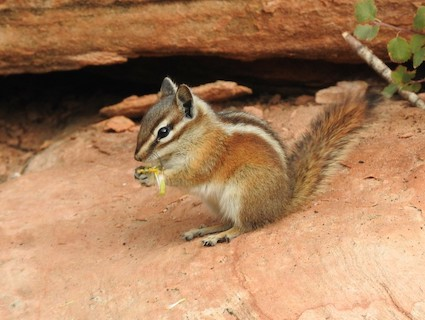

Let's explore the distribution of this **ABSOLUTE UNIT** across different parks.

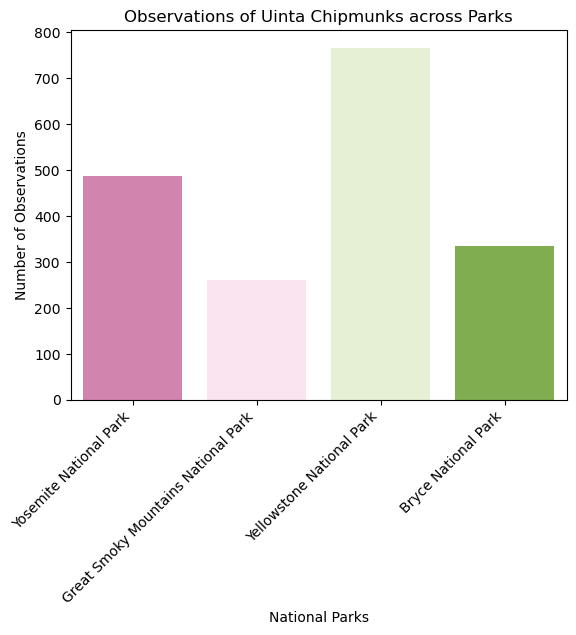

In [264]:
sns.barplot(
    x=common_name_grouped.park_name,
    y=common_name_grouped.observations[common_name_grouped.common_names == "uinta chipmunk"],
    palette="PiYG")
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Uinta Chipmunks across Parks')
plt.xticks(rotation=45, ha='right') 
sns.color_palette("PiYG", as_cmap=True)
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that Uinta Chipmunks occurred the most number of times and they were most likely to be found in Yellowstone National Park.
